# Data Preprocessing Before Train the Model

#STEPS of preprocessing of CSV data <br>
setp1: Import necessary library<br>
setp2: Read Dataset<br>
setp3: sanity check of data<br>
setp4: Exploratory Data Analysis (EDA)<br>
step5: Missing Value treatments<br>
step6: Outliers treatments<br>
step7: duplicates & garbage value treatments<br>
step8: Normalization<br>
step9: Encoding of data<br>


# setp1: Import necessary library

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# setp2: Read Dataset 


In [6]:
# Load the dataset
file_path = "Bank Data.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

# Check column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())


       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0      

In [7]:
df.head() #First 5 columns show

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.642682,Low_spent_Small_value_payments,186.2667021
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.46538026,High_spent_Medium_value_payments,361.4440039
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.2339379,Low_spent_Medium_value_payments,264.6754462
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089,High_spent_Medium_value_payments,343.8268732
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.68401842,High_spent_Large_value_payments,485.2984337


In [8]:
df.tail()#Last 5 columns show

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.4863248,Low_spent_Small_value_payments,275.5395695
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.442999,Low_spent_Small_value_payments,409.3945617
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973,High_spent_Small_value_payments,463.238981
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.4578781,Low_spent_Medium_value_payments,360.3796826


# setp3: sanity check of data
Identify the missing value, Garbaze Value, Duplicate Value

In [10]:
# Drop unnecessary columns (ID, Customer_ID, Name, SSN) that do not contribute to credit scoring
df_cleaned = df.drop(columns=["ID", "Customer_ID", "Name", "SSN"], errors="ignore")

# Convert 'Age' column to numeric (removing any special characters)
df_cleaned["Age"] = df_cleaned["Age"].astype(str).str.extract("(\d+)").astype(float)

# Convert numeric columns stored as objects to proper numerical types
numeric_columns = ["Annual_Income", "Outstanding_Debt", "Num_of_Loan", 
                   "Num_of_Delayed_Payment", "Changed_Credit_Limit", 
                   "Amount_invested_monthly", "Monthly_Balance"]

for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors="coerce")

# Fill missing numerical values with the median
for col in numeric_columns:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Fill missing categorical values with the most frequent value (mode)
categorical_columns = ["Occupation", "Type_of_Loan", "Payment_Behaviour", "Payment_of_Min_Amount"]
for col in categorical_columns:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Extract only numerical years from Credit_History_Age and fill missing with median
df_cleaned["Credit_History_Age"] = df_cleaned["Credit_History_Age"].str.extract("(\d+)").astype(float)
df_cleaned["Credit_History_Age"].fillna(df_cleaned["Credit_History_Age"].median(), inplace=True)


In [11]:
#info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [12]:
#find the missing value
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [13]:
#find the missing value percentage
df.isnull().sum()/df.shape[0]*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                        10.030
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       14.996
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       6.996
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         2.070
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           8.940
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.542
Payment_Behaviour            0.000
Monthly_Balance              1.124
dtype: float64

In [14]:
#finding duplicates
df.duplicated().sum()  

0

In [15]:
# Identifying garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("****"*10)

ID
0x160a     1
0x19cd8    1
0x19c9a    1
0x19c9b    1
0x19c9c    1
          ..
0xd95e     1
0xd95f     1
0xd960     1
0xd961     1
0x25ff1    1
Name: count, Length: 50000, dtype: int64
****************************************
Customer_ID
CUS_0xd40     4
CUS_0x9bf4    4
CUS_0x5ae3    4
CUS_0xbe9a    4
CUS_0x4874    4
             ..
CUS_0x2eb4    4
CUS_0x7863    4
CUS_0x9d89    4
CUS_0xc045    4
CUS_0x942c    4
Name: count, Length: 12500, dtype: int64
****************************************
Month
September    12500
October      12500
November     12500
December     12500
Name: count, dtype: int64
****************************************
Name
Stevex                22
Langep                21
Raymondr              20
Deepa Seetharamanm    20
Ronald Groverk        20
                      ..
Nicolaq                1
Alexei Oreskovicn      1
Herbert Lashx          1
Sarah N.y              1
Timf                   1
Name: count, Length: 10139, dtype: int64
********************************

# setp4: Exploratory Data Analysis (EDA)

In [17]:
# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le  # Store encoders for future use

# Encode 'Month' column
df_cleaned["Month"] = LabelEncoder().fit_transform(df_cleaned["Month"])

# Encode target variable 'Credit_Mix'
if df_cleaned["Credit_Mix"].dtype == 'object':
    label_encoder = LabelEncoder()
    df_cleaned["Credit_Mix"] = label_encoder.fit_transform(df_cleaned["Credit_Mix"])


In [18]:
df.describe(include="object")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,50000,50000,50000,44985,50000,50000,50000,50000,50000,44296,46502,50000,50000,50000,45530,50000,47729,50000,49438
unique,50000,12500,4,10139,976,12501,16,16121,263,6260,443,3361,4,12685,399,3,45450,7,49433
top,0x160a,CUS_0xd40,September,Stevex,39,#F%$D@*&8,_______,109945.32,2,Not Specified,19,_,Standard,1109.03,20 Years and 1 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__
freq,1,4,12500,22,1493,2828,3438,8,7173,704,2622,1059,18379,12,254,26158,2175,12694,6


In [19]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    """
    Removes outliers from specified numerical columns using the Interquartile Range (IQR) method.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25%)
        Q3 = df[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower fence
        upper_bound = Q3 + 1.5 * IQR  # Upper fence

        # Remove outliers by filtering values within the IQR range
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# List of numerical columns to check for outliers
numerical_columns = ["Annual_Income", "Monthly_Inhand_Salary", "Num_Bank_Accounts",
                     "Num_Credit_Card", "Interest_Rate", "Num_of_Loan", "Delay_from_due_date",
                     "Num_of_Delayed_Payment", "Changed_Credit_Limit", "Num_Credit_Inquiries",
                     "Outstanding_Debt", "Credit_Utilization_Ratio", "Credit_History_Age",
                     "Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"]

# Remove outliers from the dataset
df_cleaned = remove_outliers_iqr(df_cleaned, numerical_columns)

# Display the shape of the dataset after outlier removal
print(df_cleaned.shape)


(24134, 23)


In [20]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=["Credit_Mix"])  # Features
y = df_cleaned["Credit_Mix"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes after split
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")


Training Data Shape: (19307, 22), Testing Data Shape: (4827, 22)


Training Logistic Regression...


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.6354
Precision: 0.5611
Recall: 0.6354
F1-score: 0.5670


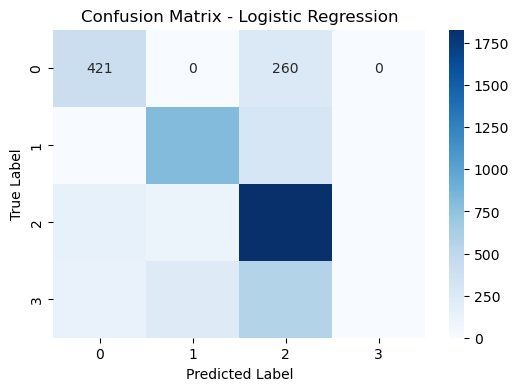

Training Random Forest...

Random Forest Performance:
Accuracy: 0.7620
Precision: 0.6651
Recall: 0.7620
F1-score: 0.6945


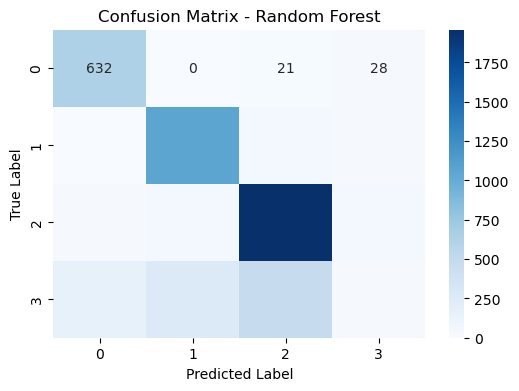

Training SVM...

SVM Performance:
Accuracy: 0.7015
Precision: 0.6175
Recall: 0.7015
F1-score: 0.6428


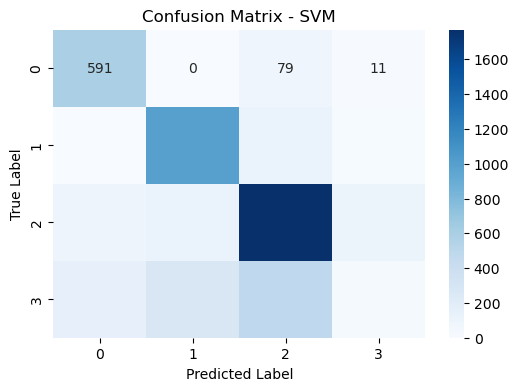

Training XGBoost...

XGBoost Performance:
Accuracy: 0.7518
Precision: 0.6480
Recall: 0.7518
F1-score: 0.6845


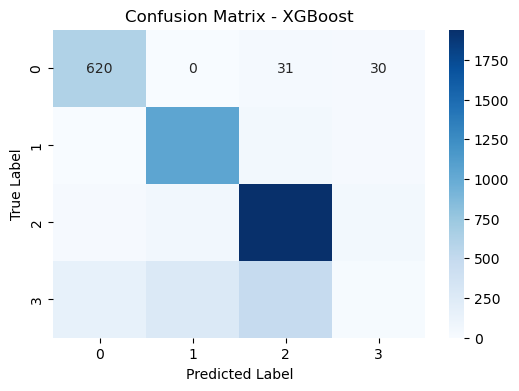


Model Performance Summary:
                 Model  Accuracy  Precision    Recall  F1-score
0  Logistic Regression  0.635384   0.561078  0.635384  0.566954
1        Random Forest  0.761964   0.665117  0.761964  0.694516
2                  SVM  0.701471   0.617495  0.701471  0.642775
3              XGBoost  0.751813   0.648030  0.751813  0.684532


In [21]:
# Function to train and evaluate models
def train_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Plot confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    return {"Model": model_name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Train Logistic Regression Model
logistic_model = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=42)
logistic_results = train_evaluate_model(logistic_model, "Logistic Regression", X_train, X_test, y_train, y_test)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_results = train_evaluate_model(rf_model, "Random Forest", X_train, X_test, y_train, y_test)

# Train Support Vector Machine (SVM)
svm_model = SVC(kernel="linear")
svm_results = train_evaluate_model(svm_model, "SVM", X_train, X_test, y_train, y_test)

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss")
xgb_results = train_evaluate_model(xgb_model, "XGBoost", X_train, X_test, y_train, y_test)

# Display results
model_results = pd.DataFrame([logistic_results, rf_results, svm_results, xgb_results])
print("\nModel Performance Summary:")
print(model_results)